In [1]:
from IPython.display import clear_output

for i in range(10):
    print(f'안녕, 지금은 {i} 번째 반복이야.')

    if i == 5:
        clear_output(wait=True)
    input()

안녕, 지금은 6 번째 반복이야.
안녕, 지금은 7 번째 반복이야.
안녕, 지금은 8 번째 반복이야.
안녕, 지금은 9 번째 반복이야.


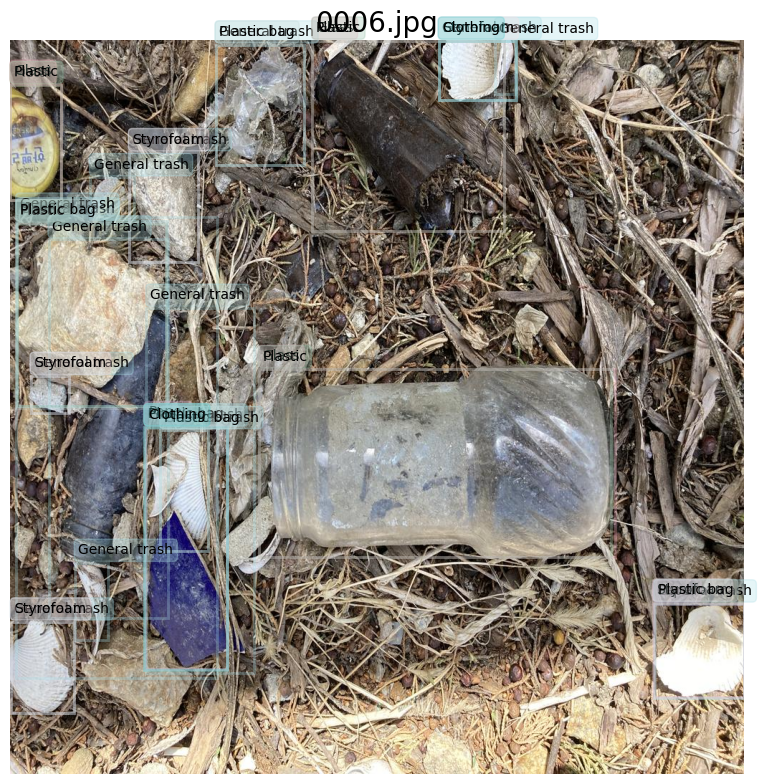

KeyboardInterrupt: Interrupted by user

In [46]:
import os
import json
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12

COLOR_MAP = [
    (171, 222, 230), (203, 170, 203), (255, 255, 181), (255, 204, 182), (243, 176, 195),
    (151, 193, 169), (254, 225, 232), (198, 219, 218), (255, 150, 138), (85, 203, 205)
]
CATEGORIES = (
    "General trash", "Paper", "Paper pack", "Metal", "Glass", 
    "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"
)

output_dir = './work_dirs/cascade_rcnn_r50_fpn_1x_coco_balanced/submission_latest.csv'
data_dir = '/data/ephemeral/home/dataset'
start_num = 0


df = pd.read_csv(output_dir)

for i, bbox_info in enumerate(df.iloc[start_num:,0]):
    bbox_info = bbox_info.split()
    img_path = os.path.join(data_dir, df.iloc[i, 1])
    img = Image.open(img_path).convert("RGB")
    fig, ax = plt.subplots()
    for j in range(len(bbox_info))[::6]:    
        cat_id, pred, bbox = int(bbox_info[j]), float(bbox_info[j+1]), list(map(float, bbox_info[j+2:j+6]))
        cat_name = CATEGORIES[cat_id]
        color = [num/255 for num in COLOR_MAP[cat_id%10]]
        
        bbox_rect = patches.Rectangle(
            (bbox[0], bbox[1]), 
            (bbox[2]-bbox[0]), (bbox[3]-bbox[1]), 
            linewidth=2, 
            edgecolor=color, 
            facecolor='none',
            alpha=0.3
        )
        ax.add_patch(bbox_rect)
        bbox_anno = plt.text(bbox[0]+5, bbox[1]-12, cat_name, fontsize=10)
        bbox_anno.set_bbox(dict(facecolor=color, alpha=0.3, boxstyle='round,pad=0.3', edgecolor=color))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(img_path.split('/')[-1], fontsize=20)
    plt.tight_layout()
    plt.show()
    
    input()
    clear_output(wait=True)
